In [ ]:
# Install Pytorch, Find the version and addons you need for your machine.
# https://pytorch.org/get-started/locally/

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [82]:
#Install ultralytics

!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15647, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 15647 (delta 128), reused 170 (delta 96), pack-reused 15393
Receiving objects: 100% (15647/15647), 14.65 MiB | 43.61 MiB/s, done.
Resolving deltas: 100% (10656/10656), done.


In [84]:
#Install the ultralytics requirments

!cd yolov5 && pip3 install -r requirments.txt

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirments.txt'


In [85]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time

IMAGES_PATH = os.path.join('lego-mindstorm-ev3-pictures', 'yoloimages2')

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

model

Using cache found in /home/crexiz/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-8 Python-3.9.2 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3080, 10018MiB)

Fusing layers... 


requirements: /home/crexiz/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [86]:
img = 'https://daily.jstor.org/wp-content/uploads/2017/12/traffic_jam_1050x700.jpg'

image 1/1: 700x1050 1 person, 25 cars, 3 buss, 4 trucks
Speed: 236.7ms pre-process, 5.4ms inference, 0.9ms NMS per image at shape (1, 3, 448, 640)


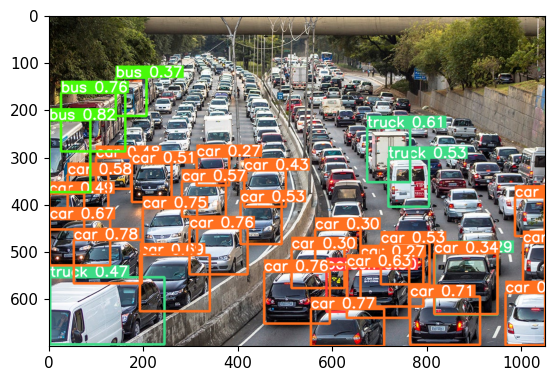

In [87]:
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
try:
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, image = cap.read()

        # Make detections 
        results = model(image)

        cv2.imshow('YOLO', np.squeeze(results.render()))

        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break
except:
    cap.release()
    cv2.destroyAllWindows()

Train The new Models

In [88]:
import os
import glob
from lxml import etree

import glob
import os
import pickle
import xml.etree.ElementTree as ET
from os import listdir, getcwd
from os.path import join
import shutil
import random
import yaml

In [89]:
cwd = os.getcwd()
files = {
    'PRETRAINED_WEIGHTS': 'exp99',
    'MODIFIED_DETECT': 'modifiedDetect.py',
    'LEGO_UTILS': 'legoUtils.py',
    'RPI_UTILS': 'rpiutils.py',
    'PREMADE_DIR': 'yolo_premade_files',
    'YOLOV5_DIR': 'yolov5',
    'LEGO_YAML': 'lego.yaml'
}
PREMADE_DIR = os.path.join(cwd, files['PREMADE_DIR'])
YOLO_DIR = os.path.join(cwd, files['YOLOV5_DIR'])
PREMADE_RUNS = os.path.join(PREMADE_DIR, files['PRETRAINED_WEIGHTS'])
YOLOV5_RUNS = os.path.join(YOLO_DIR, 'runs', 'train')
YOLOV5_EXP99 = os.path.join(YOLOV5_RUNS, os.path.basename(PREMADE_RUNS))
YOLOV5_DETECT = os.path.join(YOLO_DIR, files['MODIFIED_DETECT'])
YOLOV5_LEGO_UTILS= os.path.join(YOLO_DIR, 'utils', files['LEGO_UTILS'])
YOLOV5_RPI_UTILS = os.path.join(YOLO_DIR, 'utils', files['RPI_UTILS'])

In [90]:
# These commands copy my modified raspberry pi files to the new yolov5 folder

# NOTE: These will fail if you have already copied the files over.
if  os.path.exists(YOLOV5_EXP99):
    shutil.rmtree(YOLOV5_EXP99)
shutil.copytree(PREMADE_RUNS,  YOLOV5_EXP99)
if os.path.exists(YOLOV5_DETECT):
    os.remove(YOLOV5_DETECT)
shutil.copy(os.path.join(PREMADE_DIR, files['MODIFIED_DETECT']), YOLOV5_DETECT)
if  os.path.exists(YOLOV5_LEGO_UTILS):
    os.remove(YOLOV5_LEGO_UTILS)
shutil.copy(os.path.join(PREMADE_DIR, files['LEGO_UTILS']), YOLOV5_LEGO_UTILS)
if  os.path.exists(YOLOV5_RPI_UTILS):
    os.remove(YOLOV5_RPI_UTILS)
shutil.copy(os.path.join(PREMADE_DIR, files['RPI_UTILS']), YOLOV5_RPI_UTILS )


'/home/crexiz/Documents/LegoMindstormEV3Sorting/yolov5/utils/rpiutils.py'

In [92]:
def get_directory_names(path):
    directories = []
    with os.scandir(path) as entries:
        for entry in entries:
            if entry.is_dir():
                directories.append(entry.name)
    return directories

def replace_name_tag(xml_file, new_name):
    parser = etree.XMLParser(remove_blank_text=True)
    tree = etree.parse(xml_file, parser)
    root = tree.getroot()

    for name_tag in root.iter('name'):
        name_tag.text = new_name

    with open(xml_file, 'wb') as f:
        f.write(etree.tostring(root, pretty_print=True))

def process_directory(directory, new_name):
    os.chdir(directory)
    xml_files = glob.glob('*.xml')

    for xml_file in xml_files:
        replace_name_tag(xml_file, new_name)

def getImagesInDir(dir_path):
    image_list = []
    for filename in glob.glob(dir_path + '/*.jpg'):
        image_list.append(filename)

    return image_list


def copy_directory(src_dir, dst_dir):
    # Check if destination directory exists; if not, create it
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    # Use shutil.copytree to copy the source directory to the destination directory
    try:
        shutil.copytree(src_dir, dst_dir, dirs_exist_ok=True)
    except shutil.Error as e:
        print(f'Error copying directory: {e}')
    except OSError as e:
        print(f'Error creating directory: {e}')

def delete_directory(directory):
    if(os.path.exists(directory)):
        try:
            shutil.rmtree(directory)
        except FileNotFoundError:
            print(f'Directory not found: {directory}')
        except OSError as e:
            print(f'Error deleting directory: {e}')
   

def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def convert_annotation(dir_path, output_path, image_path, classes):
    basename = os.path.basename(image_path)
    basename_no_ext = os.path.splitext(basename)[0]
    if os.path.exists(dir_path + '/' + basename_no_ext + '.xml'):
        in_file = open(dir_path + '/' + basename_no_ext + '.xml')
        out_file2 = open(dir_path + '/' + basename_no_ext + '.txt', 'w')
        tree = ET.parse(in_file)
        root = tree.getroot()
        size = root.find('size')
        w = int(size.find('width').text)
        h = int(size.find('height').text)

        for obj in root.iter('object'):
            difficult = obj.find('difficult').text
            cls = obj.find('name').text
            if cls not in classes or int(difficult)==1:
                continue
            cls_id = classes.index(cls)
            xmlbox = obj.find('bndbox')
            b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
            bb = convert((w,h), b)
            out_file2.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')
    else:
        os.remove(dir_path + '/' + basename_no_ext + '.jpg')


def creat_classes_file(file_path, classes):
    with open(file_path, 'w') as file:
        for ele in classes:
            file.write(f'{ele}\n')

def create_test_train_val(path_name):
    train_dir = os.path.join(path_name, "train")
    test_dir = os.path.join(path_name, "test")
    val_dir = os.path.join(path_name, 'val')

    os.makedirs(train_dir)
    os.makedirs(test_dir)
    os.makedirs(val_dir)
    return test_dir, train_dir, val_dir

def split_list_randomly(strings, testPercent, valPercent):
    total_length = len(strings)
    testIdx = int(total_length * testPercent)
    valIdx = testIdx + int(total_length * valPercent)

    # Shuffle the input list in-place
    shuffled_strings = strings.copy()
    random.shuffle(shuffled_strings)

    # Split the shuffled list into two parts
    testNames = shuffled_strings[:testIdx]
    valNames = shuffled_strings[testIdx:valIdx]
    trainNames = shuffled_strings[valIdx:]

    return testNames, valNames, trainNames

# # Example usage
# strings_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
# split_percentage = 0.2

# twenty_percent, eighty_percent = split_list_randomly(strings_list, split_percentage)
# print("20% of the list:", twenty_percent)
# print("80% of the list:", eighty_percent)

def seperate_test_train_val_files(directory_names, testPercent, valPercent, yoloDir, labelTest, labelTrain, imageTest, imageTrain, labelVal, imageVal):
    for dir_path in directory_names:
        full_path = os.path.join(yoloDir, dir_path)
        image_paths = getImagesInDir(os.path.join(yoloDir, dir_path))
        base_names = []
        for image_path in image_paths:
            basename = os.path.basename(image_path)
            basename_no_ext = os.path.splitext(basename)[0]
            base_names.append(basename_no_ext)
        test,val,train = split_list_randomly(base_names, testPercent, valPercent)
        for ele in test:
            shutil.copy((full_path + '/' + ele + '.txt'), labelTest)
            shutil.copy((full_path + '/' + ele + '.jpg'), imageTest)
        
        for ele in val:
            shutil.copy((full_path + '/' + ele + '.txt'), labelVal)
            shutil.copy((full_path + '/' + ele + '.jpg'), imageVal)

        for ele in train:
            shutil.copy((full_path + '/' + ele + '.txt'), labelTrain)
            shutil.copy((full_path + '/' + ele + '.jpg'), imageTrain)


def create_yaml_file(names_list, output_file, output_dir):
    index_dict1 = {i: names_list[i] for i in range(len(names_list))}
    data = {
        'path': output_dir, 
        'train': 'images/train',
        'test': 'images/test',
        'val': 'images/val',
        'names': index_dict1
        }
    with open(output_file, 'w') as file:
        yaml.dump(data, file, default_flow_style=False)

In [93]:
#This is 1 of 4 to build the yolo_configs
# This seperates all the images into train train test and val and creates the classes file
source_dir = os.path.join(cwd, IMAGES_PATH)
output_dir = os.path.join(cwd, 'yolo_config')
classesFile = 'classes.txt'
destination_dir = os.path.join(output_dir, os.path.basename(source_dir))

yoloDir = os.path.join(output_dir, destination_dir)

if(os.path.exists(output_dir)):
    delete_directory(output_dir)
os.makedirs(output_dir)
os.makedirs(os.path.join(output_dir, 'labels'))
os.makedirs(os.path.join(output_dir, 'images'))
imagesPath = os.path.join(output_dir, 'images')
labelsPath = os.path.join(output_dir, 'labels')
labelTest, labelTrain, labelVal = create_test_train_val(labelsPath)
imageTest, imageTrain, imageVal = create_test_train_val(imagesPath)

classesFile = os.path.join(labelsPath,'classes.txt')

In [94]:
# This is 2 of 4 to build yolo_configs
# This copies all the files over to the yolo_config folder
if( os.path.exists(yoloDir)):
    delete_directory(yoloDir)
    
try:
    copy_directory(source_dir, yoloDir)
    
    print(f'Successfully copied the directory from {source_dir} to {yoloDir}.')
except Exception as e:
    print(f'Error copying the directory: {e}')

Successfully copied the directory from /home/crexiz/Documents/LegoMindstormEV3Sorting/lego-mindstorm-ev3-pictures/yoloimages2 to /home/crexiz/Documents/LegoMindstormEV3Sorting/yolo_config/yoloimages2.


In [95]:
# This is 3 of 4 to build yolo_configs
# This creates the classes files seperates the train test val files and creates the yaml config file
directory_names = sorted(get_directory_names(destination_dir))
classes = directory_names
classesFile = os.path.join(labelsPath,'classes.txt')
creat_classes_file(classesFile, classes)
seperate_test_train_val_files(directory_names, 0.2, 0.1, yoloDir, labelTest, labelTrain, imageTest, imageTrain, labelVal, imageVal)
create_yaml_file(directory_names, os.path.join(output_dir, 'lego.yaml'), output_dir)

In [96]:
# This is 4 of 4 for building yolo_config
# This itterates through each folder in the images and converts the .xml to a yolo.txt label file
for dir_path in directory_names:
    full_path = os.path.join(yoloDir, dir_path)
    process_directory(os.path.join(yoloDir,dir_path), dir_path)
    image_paths = getImagesInDir(os.path.join(yoloDir, dir_path))
    for image_path in image_paths:
        convert_annotation(full_path, labelsPath, image_path, classes)

Train the model

In [22]:
# This will run the train.py script in the yolov5 repository
# This script points to the new yolo_config files that were just created

# As the model trains it will generate new exp files like yolov5/runs/train/exp14

# To train again with new weights change where the --weights argument points to something like yolov5/runs/train/exp13/weights/best.pt
!cd yolov5 && python3 train.py --img 640 --batch 16 --epochs 15 --data ../yolo_config/lego.yaml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=../yolo_config/lego.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /home/crexiz/Documents/LegoMindstormEV3Sorting/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-163-g016e046 Python-3.9.2 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3080, 10018MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.

In [99]:
# the path variable needs to point to the new weights and model you trained in the last step will look something like below
model = torch.hub.load('ultralytics/yolov5', 'custom', path=os.path.join(YOLOV5_EXP99, 'weights', 'best.pt'), force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/crexiz/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-9 Python-3.9.2 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3080, 10018MiB)

Fusing layers... 
Model summary: 157 layers, 7242067 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


requirements: /home/crexiz/.cache/torch/hub/requirements.txt not found, check failed.


In [100]:
# This will capture from a video camera or rpi camera module
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, image = cap.read()
    
    # Make detections 
    results = model(image)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# This shows how to read in from an image

imagePath = '***Some Image Path***' # Path to an image
image = cv2.imread(imagePath)

results = model(image)
image_height = 480
image_width = 640
line_width = 3
text_color = (0, 255, 0)
line_color = (0, 255, 0)
font_scale = 0.7
font = cv2.FONT_HERSHEY_SIMPLEX
font_thickness = 2

df=results.pandas().xyxy[0]
print(df)
df['left_distance'] = df['xmin']
df['top_distance'] = df['ymin']
df['right_distance'] = image_width - df['xmax']
df['bottom_distance'] = image_height - df['ymax']

for idx, row in df.iterrows():
    xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    left_dist, top_dist, right_dist, bottom_dist = row['left_distance'], row['top_distance'], row['right_distance'], row['bottom_distance']
    
    # Draw lines to represent the distances
    cv2.line(image, (xmin, ymin), (0, ymin), line_color, line_width)
    cv2.line(image, (xmin, ymin), (xmin, 0), line_color, line_width)
    cv2.line(image, (xmax, ymax), (image_width, ymax), line_color, line_width)
    cv2.line(image, (xmax, ymax), (xmax, image_height), line_color, line_width)

    # Draw text to show the distance values
    cv2.putText(image, f'{left_dist:.1f}', (xmin // 2, ymin), font, font_scale, text_color, font_thickness)
    cv2.putText(image, f'{top_dist:.1f}', (xmin, ymin // 2), font, font_scale, text_color, font_thickness)
    cv2.putText(image, f'{right_dist:.1f}', (xmax + (image_width - xmax) // 2, ymax), font, font_scale, text_color, font_thickness)
    cv2.putText(image, f'{bottom_dist:.1f}', (xmax, ymax + (image_height - ymax) // 2), font, font_scale, text_color, font_thickness)
    cv2.imshow('lego', image)

In [ ]:
#Clean up cv2 glitches
cv2.destroyAllWindows()

Export to onnx

In [67]:
command = f"cd yolov5 && python3 export.py --weights {os.path.join(YOLOV5_EXP99,'weights','best.pt')} --img-size 640 640 --batch-size 1 --include onnx --opset 13"
print(command)
!{command}

cd yolov5 && python3 export.py --weights /home/crexiz/Documents/LegoMindstormEV3Sorting/yolov5/runs/train/exp99/weights/best.pt --img-size 640 640 --batch-size 1 --include onnx --opset 13
export: data=data/coco128.yaml, weights=['/home/crexiz/Documents/LegoMindstormEV3Sorting/yolov5/runs/train/exp99/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=13, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-163-g016e046 Python-3.9.2 torch-1.8.1+cu111 CPU

Fusing layers... 
Model summary: 157 layers, 7242067 parameters, 0 gradients, 16.5 GFLOPs

PyTorch: starting from /home/crexiz/Documents/LegoMindstormEV3Sorting/yolov5/runs/train/exp99/weights/best.pt with output shape (1, 25200, 91) (14.2 MB)

ONNX: starting export with onnx 1.13.1...
ONNX: export success ✅ 1.1s, saved

In [66]:
# Just so you know where the onnx file was created to it makes the onnx file 
# in the same dir as where the weights were
ONNX_FILE_LOCATION = os.path.join(YOLOV5_EXP99, 'weights', 'best.onnx')
print(ONNX_FILE_LOCATION)



/home/crexiz/Documents/LegoMindstormEV3Sorting/yolov5/runs/train/exp99/weights/best.onnx
/home/crexiz/Documents/LegoMindstormEV3Sorting/yolov5/runs/train/exp99/weights/best.onnx 


In [73]:
# This is the command that will run the onnx file, you can also point the weights to a different exp#/weights/best.pt and it will also run those.

detectCommand = f"cd yolov5 && python3 {files['MODIFIED_DETECT']} --weights {ONNX_FILE_LOCATION} --data {os.path.join(output_dir, files['LEGO_YAML'])} --source 0"
print(detectCommand)
# python3 detect.py --weights /home/crexiz/Documents/yolo/YOLO-Drowsiness-Detection/yolov5/runs/train/exp14/weights/best.onnx --data /home/crexiz/Documents/yolo/YOLO-Drowsiness-Detection/data/lego.yaml --source 0
!{detectCommand}

cd yolov5 && python3 modifiedDetect.py --weights /home/crexiz/Documents/LegoMindstormEV3Sorting/yolov5/runs/train/exp99/weights/best.onnx --data /home/crexiz/Documents/LegoMindstormEV3Sorting/yolo_config/lego.yaml --source 0
modifiedDetect: weights=['/home/crexiz/Documents/LegoMindstormEV3Sorting/yolov5/runs/train/exp99/weights/best.onnx'], source=0, data=/home/crexiz/Documents/LegoMindstormEV3Sorting/yolo_config/lego.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /home/crexiz/Documents/LegoMindstormEV3Sorting/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-163-g016e046 Python-3.9.2 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3080, 10018Mi